In [4]:
import sys, os

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [5]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [6]:
# weight decay (가중치 감쇠) 설정
weight_decay_lambda = 0.1

In [7]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100, 100], output_size=10, weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

In [9]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [10]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch: " + str(epoch_cnt) + ", train acc: " + str(train_acc) + ", test acc: " + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch: 0, train acc: 0.12666666666666668, test acc: 0.1187
epoch: 1, train acc: 0.13, test acc: 0.122
epoch: 2, train acc: 0.14, test acc: 0.1271
epoch: 3, train acc: 0.15, test acc: 0.137
epoch: 4, train acc: 0.17, test acc: 0.1533
epoch: 5, train acc: 0.20666666666666667, test acc: 0.165
epoch: 6, train acc: 0.2633333333333333, test acc: 0.1837
epoch: 7, train acc: 0.2833333333333333, test acc: 0.2005
epoch: 8, train acc: 0.3, test acc: 0.2198
epoch: 9, train acc: 0.30666666666666664, test acc: 0.2291
epoch: 10, train acc: 0.33666666666666667, test acc: 0.2404
epoch: 11, train acc: 0.34, test acc: 0.2466
epoch: 12, train acc: 0.3433333333333333, test acc: 0.252
epoch: 13, train acc: 0.3433333333333333, test acc: 0.2559
epoch: 14, train acc: 0.3466666666666667, test acc: 0.2578
epoch: 15, train acc: 0.36333333333333334, test acc: 0.2693
epoch: 16, train acc: 0.3566666666666667, test acc: 0.271
epoch: 17, train acc: 0.36, test acc: 0.2759
epoch: 18, train acc: 0.3566666666666667, test 

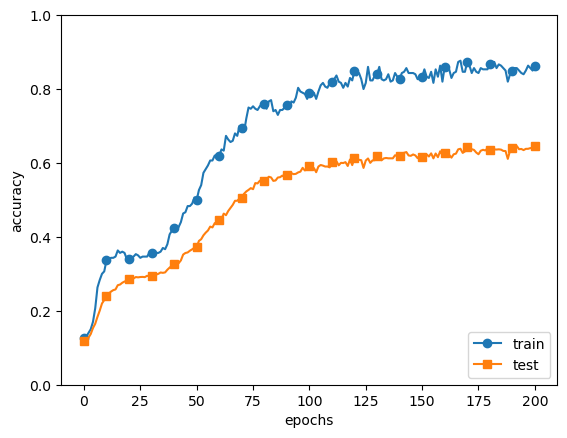

In [12]:
# 그래프 그리기
markers = {'train' : 'o', 'test' : 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker = 'o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()